# 와우

In [ ]:
### PC/EOF script for Week 12 
import netCDF4 as nc
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [5]:
############### Importing 2m temperature Data

In [6]:
DATA_PATH = '/Users/dhkim/gh/Ocean_Data_Analysis/DATA/'
data = nc.Dataset(DATA_PATH + '/T2m_ERA5_1979_2018_lowR.nc', 'r')

lon = data.variables['lon'][:] ## Lon
lat = data.variables['lat'][:] ## Lat
time = data.variables['time'][:] ## Time
T2 = data.variables['t2m'][:,:,:] ## T2m data
data.close()

In [7]:
###### Removing the time mean value
## T2m time mean 
T2_mean = np.mean(T2, 0)

In [8]:
## Subtracting the time mean
T2a = np.array(T2 - T2_mean) 

In [9]:
###### Covariance matrix for T2m data
## converting 3D data to 2D (from 2D space to 1D space)
T2a_1d = np.reshape( T2a, (len(time), len(lon)*len(lat)) )

In [10]:
## Produce the covariance matrix
cov_T2a_1d = np.matmul(T2a_1d.T, T2a_1d)/len(time)
#cov_T2a_1d = np.cov(T2a_1d.T)

In [11]:
############### Retrieving eigenvalues & eigenvectors

In [12]:
## Eigen values & vectors
eigen_val, eigen_vec = np.linalg.eig(cov_T2a_1d)

In [22]:
## Fraction of each eigenvalue
efrac = eigen_val / np.sum(eigen_val)
efrac

array([3.5285237e-01, 7.8903191e-02, 7.1158513e-02, ..., 6.1348196e-12,
       1.6783942e-11, 5.4256148e-12], dtype=float32)

In [14]:
## PC Time-series: projection of data to eigenvector 
PCs = np.dot(T2a_1d, eigen_vec)

In [15]:
############### Primary Modes
MODE = 1

In [16]:
## EOF First mode 
EOF = np.reshape(eigen_vec[:,MODE-1],(len(lat),len(lon)))
print (EOF.shape)

(30, 60)


In [17]:
## First PC Time-series
PC = PCs[:,MODE-1]
print (PC.shape)
efrac1 = efrac[MODE-1] * 100

(40,)


In [18]:
###### Normalize eigenvector 
n_EOF = -EOF * np.sqrt(eigen_val[MODE-1])

In [19]:
###### Normalize PC Time-series
n_PC = -(PC - np.mean(PC)) / np.std(PC)

Text(1.0, 1.0, '35.29%')

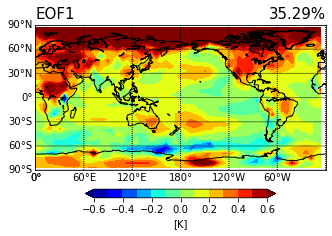

In [20]:
##################### Figures  
fig = plt.figure(figsize=(5.2,7))

###### Mapping of EOF
levels = np.arange(-0.6,0.7,0.1)

ax1 = plt.subplot(211) ## ax1: configuration of the figure

m=Basemap(projection='cyl',resolution='c',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360)
m.drawparallels(np.arange(-90,120,30),labels=[1,0,0,0])
m.drawmeridians(np.arange(0,420,60),labels=[0,0,0,1])
m.drawcoastlines()

## Shading
draw = plt.contourf(lon,lat,n_EOF,levels,cmap='jet',extend='both')

## Colorbar for Shading
plt.colorbar(draw, orientation='horizontal',fraction=0.05,pad=0.11,label='[K]')

## ax1 Title
ax1.set_title('EOF%d'%(MODE),loc='left',fontsize=15)
ax1.set_title('%1.2f%%'%(efrac1),loc='right',fontsize=15)

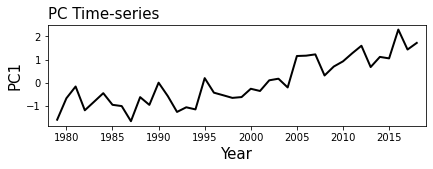

In [21]:
####### Plotting the PC time-series
ax2 = plt.subplot(212) 

years = np.arange(1979,2019)

ax2.plot(years, n_PC, 'k-',linewidth=2)

## Tick options
ax2.set_xticks(np.arange(1980,2019,5)) ## set major xtick

## Axes options
ax2.set_xlabel('Year',fontsize=15) ## x-axis label
ax2.set_ylabel('PC1',fontsize=15) ## y-axis label
ax2.set_xlim(1978,2019) ## set x-axis limit

## ax2 Title
ax2.set_title('PC Time-series',loc='left',fontsize=15)
plt.tight_layout()